## CV2

pip install numpy opencv-python dlib imutils

In [12]:
import cv2

cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

if vc.isOpened():            # try to get the first frame
    rval, frame = vc.read()
else:
    rval = False

while rval:
    cv2.imshow("preview", frame)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27:              # exit on ESC
        break
vc.release()
cv2.destroyWindow("preview")

In [13]:
import cv2 as cv

capture = cv.VideoCapture(0) 

while True:
    isTrue,frame = capture.read()
    cv.imshow('Video',frame)
    if cv.waitKey(20) & 0xFF==ord('d'):
        break

capture.release()
cv.destroyAllWindows()

# 0 <-- refers to the camera , replace it with file path to read a video file
# cv.waitKey(20) & 0xFF==ord('d') <-- to destroy window when key is pressed

# dlib

In [3]:
import cv2
# if (you have only 1 webcam){ set device = 0} else{ chose your favorite webcam setting device = 1, 2 ,3 ... }
cap = cv2.VideoCapture(0)
while True:
  # Getting our image by webcam and converting it into a gray image scale
    _, image = cap.read()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # show the gray image
    cv2.imshow("Output", image)
    
    #key to give up the app.
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
cap.release()

In [ ]:
from imutils import face_utils
import dlib
import cv2
 
# Vamos inicializar um detector de faces (HOG) para então
# let's go code an faces detector(HOG) and after detect the 
# landmarks on this detected face

# p = our pre-treined model directory, on my case, it's on the same script's diretory.
p = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(p)

cap = cv2.VideoCapture(0)
 
while True:
    # Getting out image by webcam 
    _, image = cap.read()
    # Converting the image to gray scale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
    # Get faces into webcam's image
    rects = detector(gray, 0)
    
    # For each detected face, find the landmark.
    for (i, rect) in enumerate(rects):
        # Make the prediction and transfom it to numpy array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
    
        # Draw on our image, all the finded cordinate points (x,y) 
        for (x, y) in shape:
            cv2.circle(image, (x, y), 2, (0, 255, 0), -1)
    
    # Show the image
    cv2.imshow("Output", image)
    
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cv2.destroyAllWindows()
cap.release()

pip install SpeechRecognition
pip install pyttsx3
pip install pyaudio

In [ ]:
# Python program to translate 
# speech to text and text to speech 


import speech_recognition as sr 
import pyttsx3 

# Initialize the recognizer 
r = sr.Recognizer() 

# Function to convert text to 
# speech 
def SpeakText(command): 
	
	# Initialize the engine 
	engine = pyttsx3.init() 
	engine.say(command) 
	engine.runAndWait() 
	
	
# Loop infinitely for user to 
# speak 

while(1):	 
	
	# Exception handling to handle 
	# exceptions at the runtime 
	try: 
		
		# use the microphone as source for input. 
		with sr.Microphone() as source2: 
			print('Please talk::')
			# wait for a second to let the recognizer 
			# adjust the energy threshold based on 
			# the surrounding noise level 
			r.adjust_for_ambient_noise(source2, duration=0.2) 
			
			#listens for the user's input 
			audio2 = r.listen(source2) 
			
			# Using ggogle to recognize audio 
			MyText = r.recognize_google(audio2) 
			MyText = MyText.lower() 

			print("Did you say: "+MyText) 
			SpeakText(MyText) 

			if MyText == 'stop':
				print('Thanks for using')
				break

	except sr.RequestError as e: 
		print("Could not request results; {0}".format(e)) 
		
	except sr.UnknownValueError: 
		print("unknown error occured") 


In [3]:
from platform import python_version
print(python_version())

3.7.4


## Streamlit

https://www.analyticsvidhya.com/blog/2020/12/streamlit-web-api-for-nlp-tweet-sentiment-analysis/

pip install streamlit

In [3]:
import streamlit as st  ## streamlit
import pandas as pd  ## for data manipulation
import pickle   ## For model loading 
import spacy  ## For NLP tasks 
import time

from PIL import Image   ## For image
from io import StringIO  ## for text input and output from the web app

In [ ]:
def load_model():
#declare global variables
    global nlp
    global textcat

nlp = spacy.load(model_path)  ## will load the model from the model_path 
textcat = nlp.get_pipe(model_file)   ## will load the model file

## MLP

https://www.analyticsvidhya.com/blog/2020/12/mlp-multilayer-perceptron-simple-overview/

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [2]:
num_labels = len(np.unique(y_train))
print("total de labels:t{}".format(num_labels))
print("labels:ttt{0}".format(np.unique(y_train)))

total de labels:t10
labels:ttt[0 1 2 3 4 5 6 7 8 9]


In [3]:
#converter em one-hot
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
image_size = x_train.shape[1] 
input_size = image_size * image_size

print("x_train:t{}".format(x_train.shape))
print("x_test:tt{}n".format(x_test.shape))

x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255

x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

print("x_train:t{}".format(x_train.shape))
print("x_test:tt{}".format(x_test.shape))

x_train:t(60000, 28, 28)
x_test:tt(10000, 28, 28)n
x_train:t(60000, 784)
x_test:tt(10000, 784)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

# Parameters
batch_size = 128 # It is the sample size of inputs to be processed at each training stage. 
hidden_units = 256
dropout = 0.01

# Nossa  MLP com ReLU e Dropout 
model = Sequential()

model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_labels))


In [6]:
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.4230 - accuracy: 0.8702
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1981 - accuracy: 0.9410
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1493 - accuracy: 0.9551
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1329 - accuracy: 0.9592
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1148 - accuracy: 0.9648 0s - loss: 0.1145 - accura
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1026 - accuracy: 0.9682
Epoch 7/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0977 - accuracy: 0.9697
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0874 - accuracy: 0.9723
Epoch 9/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0804 - accuracy: 0.9751
Epoch 10/10
469/469 [==============================] - 5s 10ms/step

In [9]:
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("nAccuracy: %.1f%%n" % (100.0 * acc))

nAccuracy: 98.2%n


## CNN 

In [39]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [40]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [41]:
# load dataset
(trainX, trainy), (testX, testy) = datasets.cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


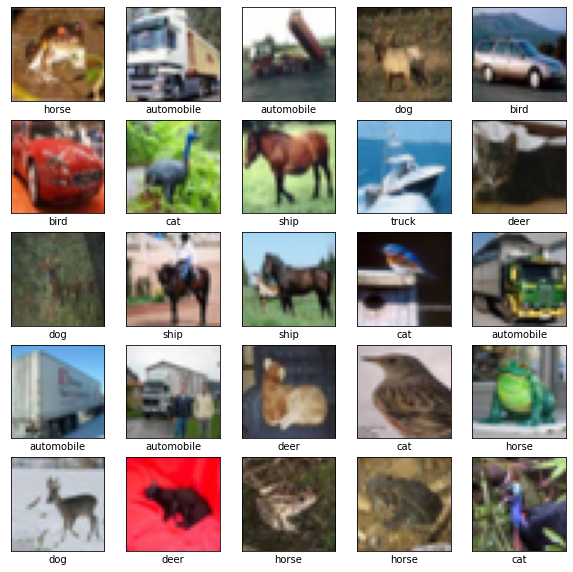

In [42]:
class_names = ['airplane', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck', 'automobile']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra indexss
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [58]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [59]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [61]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_16 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)              

In [97]:
# define cnn model VGG
def define_model():
	model = models.Sequential()
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(layers.MaxPooling2D((2, 2)))
	model.add(layers.Dropout(0.2))
	model.add(layers.Flatten())
	model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(layers.Dropout(0.2))
	# compile model
	opt = optimizers.SGD(lr=0.04, momentum=0.9)
	model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
	print(model.summary())
	return model

In [98]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])
define_model()

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 8, 8, 64)        

313/313 - 1s - loss: 3.6008 - accuracy: 0.6735


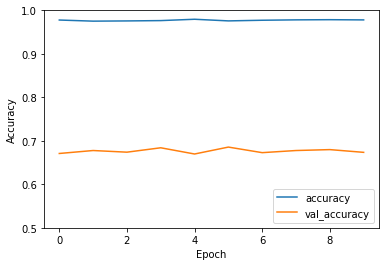

In [99]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [100]:
print(test_acc)


0.6735000014305115


# MatPlotLib

In [60]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [56]:
X = [1,3,5,7,9]
y = [4,2,5,7,3]

In [70]:
a = np.sort(np.random.randint(0,10,6))
b = np.sort(np.random.randint(5,15,6))

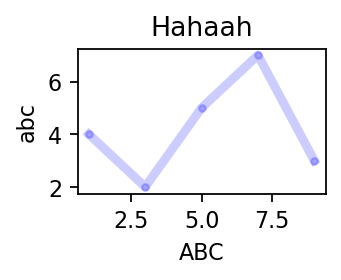

In [71]:
plt.figure(figsize=(2,1.2), dpi=160)
plt.plot(X, y, 'b.-', alpha=0.2, linewidth=4)
plt.xlabel('ABC')
plt.ylabel('abc')
plt.title('Hahaah')
plt.show()

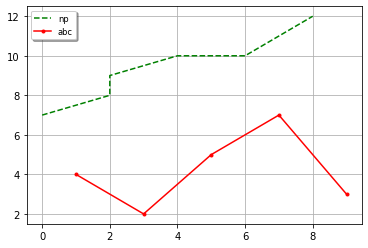

In [86]:
plt.plot(a,b,'g--', label='np')
plt.plot(X,y,'r.-', label='abc')
plt.grid()

plt.legend(loc='best', shadow=True, fontsize='small')    #it shows the params of the graph

In [93]:
lab = ['Google', 'Mi', 'OnePlus', 'Apple', 'Amazon']

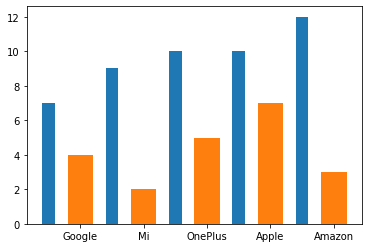

No handles with labels found to put in legend.


<BarContainer object of 5 artists>

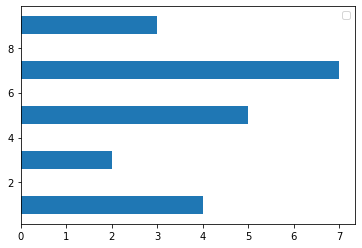

In [102]:
plt.xticks(X, lab)    #it gives the labels to the bar
plt.bar(a, b, width=0.4, label='xyz')
plt.bar(X, y)
plt.show()
plt.legend()

plt.barh(X, y)    #for inverted view

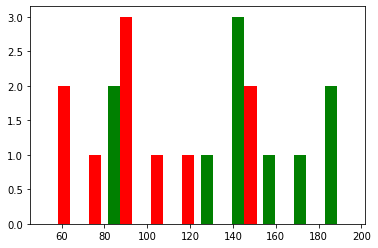

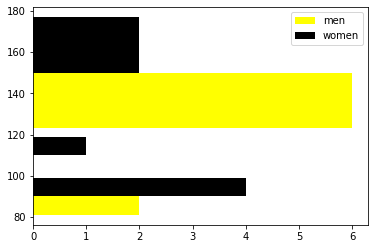

In [126]:
men = np.sort(np.random.randint(80, 200, 10))
women = np.sort(np.random.randint(50, 150, 10))

plt.hist([men, women], color=['green', 'red'], label=[men, women])
plt.show()
plt.hist([men, women], bins = [80,100,120,180], rwidth = 0.9, color=['yellow', 'black'], label=['men', 'women'],
         orientation='horizontal')
plt.legend()

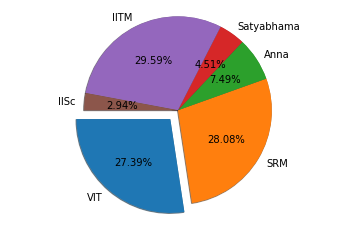

In [181]:
val = np.random.random(6) * 100
lab = ['VIT', 'SRM', 'Anna', 'Satyabhama', 'IITM', 'IISc']

plt.pie(val, labels=lab, radius=4, autopct='%0.2f%%', shadow=True, explode=[0.5,0,0,0,0,0], startangle=180)
plt.axis('equal')    #sorts the ellipse shape to circle
plt.savefig('C:/Users/Afrid/Desktop/pie.pdf', bbox_inches='tight', pad_inches=2, transparent=True)
plt.show()

### DateTime

In [31]:
import datetime as dt
import pandas as pd

today = dt.date.today()
weekday = today.weekday()
start_delta = dt.timedelta(days=weekday)
start_of_week = today - start_delta
week_dates = []

#loop to iterate whole week dates 
for day in range(7):
        week_dates.append(start_of_week + dt.timedelta(days=day))
        
start_date=week_dates[0]
end_date=week_dates[6]

df['date'] = pd.to_datetime(df['date'])  
mask = (df['date'] > start_date) & (df['date'] <= end_date)
df = df.loc[mask]
df.count(level="driver_id") 

###or
df.groupby('driver_id').driver_id.count()

2021-01-18 2021-01-24


# Pandas

In [ ]:
"""
5 Ways of creating df using pands
read_csv(), 
read_excel(), 
##set, tuple, dict, list
DataFrame() - dict insert{ac: af, bc:bf}
//tuples list
[(ab,cd), (ef, gh)]
//set list
[{ad: cd, age: asdfk}, {cd: f, age:afdsf}]
to_excel('weather.xslx') - it writes the modified to new excel file
###nrows, ncol, index, sheet_name, header, startrow, startcol, converters, na_values, parse_dates
"""

In [ ]:
'''
## INTERPOLATE linear, cubic, polynomial
dropna(how='all' or thresh=1)
pd.date_range(start, stop, periods, freq), pd.DatetimeIndex(), df.reindex()
pd.replace('A-Za-z', '', regex=True)
pd.concat(['abc', 'xyz'], ignore_index=True)
pd.concat(['abc', 'xyz'], keys=['india', 'US'])
pd.merge(df1, df2, on='city', how='outer/right/left/inner', suffixes='_left', '_right')
pd.pivot(index='date', columns='abc', values='xyz')
pd.pivot_tables(index='abc', columns='abc', aggfunc='sum/count/mean')     ## it aggregates the same rows and gives mean
pd.pivot_tables(index='abc', columns='xyz', margin=True)   ## it gives the square sum/value of rows and col
pd.Grouper(freq='M', key='date')
pd.melt(df, id_vars=['days'], var_name=None, value_name='XYZ')
pd.stack(level=0)
pd.crosstab(df.abc, [df.xyz, df.pqr], margins=True, values='', aggfunc='')
'''

In [52]:
'''
## pysql, sqlalchemy, pytz/dateutil-alltimezones
pd.read_sql_table(customer, engine),  pd.read_sql

##TimeSeries
//from pandas.tseries.holiday import AbstractHolidayCalender
//CustonBusinessDay(calender, weekmask, holidays)
df.date.resample('H/M/Q/B/SM...')
df.date_range(start, end/period, freq)
df.set_index(r, inplace=True)
df.asfreq(method='pad')
pd.to_datetime(abc, format='%Y.%m', errors='coerce')

a=pd.Period()
a.start_time /.end_time
pd.period_range(start, end, freq)
a.to_timestamp() /a.to_period()
df.map(lambda a: a.start_time)
df.tz_localize(tz='US/Eastern')
df.tz_convert(tz='Europe/Berlin')
df.shift(1)  ---it shifts the values 
df.tshift(-1)   ---it shifts the dates
'''

"\n## pysql, sqlalchemy\npd.read_sql_table(customer, engine),  pd.read_sql\n\n##TimeSeries\n//from pandas.tseries.holiday import AbstractHolidayCalender\n//CustonBusinessDay(calender, weekmask)\ndf.date.resample('H/M/Q/B/SM...')\ndf.date_range(start, end/period, freq)\ndf.set_index(r, inplace=True)\ndf.asfreq(method='pad')\n\n"

In [54]:
import pandas as pd

In [55]:
df = pd.read_csv('Finance_data.csv', nrows=100)
df.columns

Index(['Series_reference', 'Period', 'Data_value', 'Suppressed', 'STATUS',
       'UNITS', 'Magnitude', 'Subject', 'Group', 'Series_title_1',
       'Series_title_2', 'Series_title_3', 'Series_title_4', 'Series_title_5'],
      dtype='object')

In [59]:
pd.to_datetime(df.Period, format='%Y.%m', errors='coerce')

0    1970-01-01 00:00:00.000002016
1    1970-01-01 00:00:00.000002016
2    1970-01-01 00:00:00.000002016
3    1970-01-01 00:00:00.000002017
4    1970-01-01 00:00:00.000002017
                  ...             
95   1970-01-01 00:00:00.000002017
96   1970-01-01 00:00:00.000002017
97   1970-01-01 00:00:00.000002018
98   1970-01-01 00:00:00.000002018
99   1970-01-01 00:00:00.000002018
Name: Period, Length: 100, dtype: datetime64[ns]

In [84]:
# df.reset_index(inplace=True)
df.set_index('Period')
df['Period'] = pd.Series(pd.date_range("2016-01-01", periods=1832, freq="D"))
pd.DatetimeIndex(df['Period'])
df = df.drop(['Suppressed', 'STATUS', 'Series_title_5'], axis=1)
df.head()

,Series_reference,Period,Data_value,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4
0,BDCQ.SF1AA2CA,2016-01-01,1116.386,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted
1,BDCQ.SF1AA2CA,2016-01-02,1070.874,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted
2,BDCQ.SF1AA2CA,2016-01-03,1054.408,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted
3,BDCQ.SF1AA2CA,2016-01-04,1010.665,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted
4,BDCQ.SF1AA2CA,2016-01-05,1233.700,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Forestry and Logging,Current prices,Unadjusted


In [92]:
g = df.groupby('UNITS')
g
for group, group_df in g:
    print(group, group_df)
    
g.get_group('Dollars').tail(5)

Dollars    Series_reference     Period  Data_value    UNITS  Magnitude  \
0     BDCQ.SF1AA2CA 2016-01-01    1116.386  Dollars          6   
1     BDCQ.SF1AA2CA 2016-01-02    1070.874  Dollars          6   
2     BDCQ.SF1AA2CA 2016-01-03    1054.408  Dollars          6   
3     BDCQ.SF1AA2CA 2016-01-04    1010.665  Dollars          6   
4     BDCQ.SF1AA2CA 2016-01-05    1233.700  Dollars          6   
..              ...        ...         ...      ...        ...   
95    BDCQ.SF1CC3CA 2016-04-05    2279.911  Dollars          6   
96    BDCQ.SF1CC3CA 2016-04-06    2361.189  Dollars          6   
97    BDCQ.SF1CC3CA 2016-04-07    2229.447  Dollars          6   
98    BDCQ.SF1CC3CA 2016-04-08    2412.505  Dollars          6   
99    BDCQ.SF1CC3CA 2016-04-09    2449.281  Dollars          6   

                           Subject                           Group  \
0   Business Data Collection - BDC  Industry by financial variable   
1   Business Data Collection - BDC  Industry by financial v

,Series_reference,Period,Data_value,UNITS,Magnitude,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4
95,BDCQ.SF1CC3CA,2016-04-05,2279.911,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Wood and Paper Products Manufacturing,Current prices,Unadjusted
96,BDCQ.SF1CC3CA,2016-04-06,2361.189,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Wood and Paper Products Manufacturing,Current prices,Unadjusted
97,BDCQ.SF1CC3CA,2016-04-07,2229.447,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Wood and Paper Products Manufacturing,Current prices,Unadjusted
98,BDCQ.SF1CC3CA,2016-04-08,2412.505,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Wood and Paper Products Manufacturing,Current prices,Unadjusted
99,BDCQ.SF1CC3CA,2016-04-09,2449.281,Dollars,6,Business Data Collection - BDC,Industry by financial variable,Sales (operating income),Wood and Paper Products Manufacturing,Current prices,Unadjusted


In [94]:
g.max(), g.describe()

(        Series_reference     Period  Data_value  Magnitude  \
 UNITS                                                        
 Dollars    BDCQ.SF1CC3CA 2016-04-09   15202.125          6   
 
                                 Subject                           Group  \
 UNITS                                                                     
 Dollars  Business Data Collection - BDC  Industry by financial variable   
 
                    Series_title_1                         Series_title_2  \
 UNITS                                                                      
 Dollars  Sales (operating income)  Wood and Paper Products Manufacturing   
 
          Series_title_3 Series_title_4  
 UNITS                                   
 Dollars  Current prices     Unadjusted  ,
         Data_value                                                        \
              count        mean          std      min       25%       50%   
 UNITS                                                           

In [51]:
import numpy as np

dates = pd.date_range('2018-09-28', periods=10)
data = pd.Series(np.random.randint(1, 15, size=10), index=dates)
data

2018-09-28    14
2018-09-29     6
2018-09-30    11
2018-10-01    13
2018-10-02     7
2018-10-03     7
2018-10-04    14
2018-10-05    10
2018-10-06     9
2018-10-07    10
Freq: D, dtype: int32

In [98]:
import pandas as pd

df = pd.read_csv('data.txt', parse_dates=['Date'], index_col='Date')
df.head(2) 

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-01,153.17,153.33,152.22,153.18,16404088
2017-06-02,153.58,155.45,152.89,155.45,27770715


In [99]:
df['2017-06-01':'2017-06-11'].Close

Date
2017-06-01    153.18
2017-06-02    155.45
2017-06-05    153.93
2017-06-06    154.45
2017-06-07    155.37
2017-06-08    154.99
2017-06-09    148.98
Name: Close, dtype: float64

Date
2017-06-30    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: M, Name: Close, dtype: object

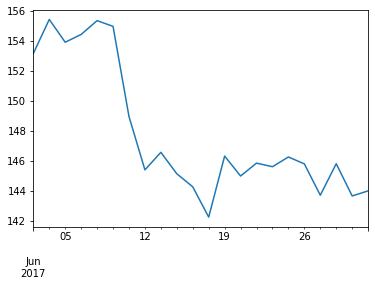

In [100]:
%matplotlib inline
df_close=df.Close.resample('M')
df_close.plot()

In [101]:
pd.Period('2016-01')

Period('2016-01', 'M')

In [102]:
from datetime import date
tdy = date.today()
a = pd.Period(tdy, freq='D')
b= prd-7
a.to_timestamp(), b.to_timestamp()

(Timestamp('2021-01-25 00:00:00'), Timestamp('2021-01-17 00:00:00'))

In [106]:
US = df.tz_localize(tz='US/Eastern')
EU = df.tz_localize(tz='Europe/Berlin')
US.head(2), EU.head(2)

(                             Open    High     Low   Close    Volume
 Date                                                               
 2017-06-01 00:00:00-04:00  153.17  153.33  152.22  153.18  16404088
 2017-06-02 00:00:00-04:00  153.58  155.45  152.89  155.45  27770715,
                              Open    High     Low   Close    Volume
 Date                                                               
 2017-06-01 00:00:00+02:00  153.17  153.33  152.22  153.18  16404088
 2017-06-02 00:00:00+02:00  153.58  155.45  152.89  155.45  27770715)